In [1]:
import qiskit 
from qiskit import QuantumCircuit

In [2]:
def oracle(circuit, target_state):
    for bit_ke, bit in enumerate(target_state):
        if bit == "0":
            circuit.X(bit_ke)
    circuit.cz(0,1)
    for bit_ke, bit in enumerate(target_state):
        if bit == "0":
            circuit.X(bit_ke)

In [3]:
def difussion_operator(circuit, num_qubits):
    circuit.h(range(num_qubits))
    circuit.x(range(num_qubits))
    circuit.h(num_qubits-1)
    circuit.mcx(list(range(num_qubits-1)), num_qubits-1)
    circuit.h(num_qubits-1)
    circuit.x(range(num_qubits))
    circuit.h(range(num_qubits))

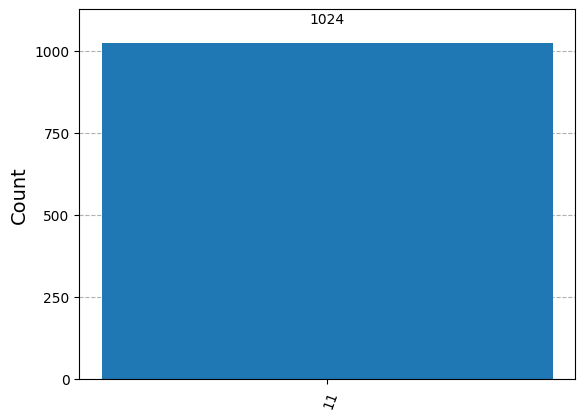

In [4]:
# inisialisasi circuit qunatum dengan 2 qubit dan 2 bit klasik
num_qubits = 2
circuit = QuantumCircuit(num_qubits, num_qubits)

# mengubah semua qubit di keadaan seperposisi
circuit.h(range(num_qubits))

# menjalankan oracle
oracle(circuit, "11")

# diffussion
difussion_operator(circuit, num_qubits)

# pengukuran
circuit.measure(range(num_qubits), range(num_qubits))

#simulasi
from qiskit_aer import AerSimulator
Aer_sim = AerSimulator()

from qiskit import transpile
new = transpile(circuit, Aer_sim)

job = Aer_sim.run(new)
result = job.result()
counts = result.get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts)




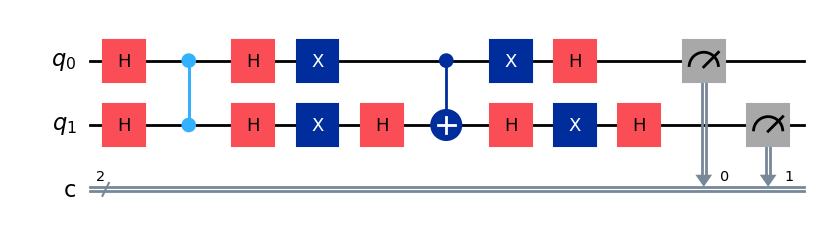

In [5]:

circuit.draw("mpl")

In [6]:
counts

{'11': 1024}

In [7]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum",
                               token="3665514b910258010b1aaf014078f35e84a325e8457652dcde4780f8e201c816742b57afc7741ec9028bce6e4945cf5862a1e7590261236c8dab099911405c77")


In [8]:
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=2)


In [9]:
backend.num_qubits

127

In [10]:
from qiskit import transpile

new_circuit = transpile(circuit,backend)
job = backend.run(new_circuit)

result = job.result()

# Mengambil hasil eksperimen pertama dari list `results`
experiment_result = result.results[0]

# Mendapatkan counts dari hasil eksperimen
counts = experiment_result.data.counts

plot_histogram(counts)


C:\Users\user\AppData\Local\Temp\ipykernel_4680\1167532990.py:4: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  job = backend.run(new_circuit)


IBMBackendApiError: 'Error submitting job: \'404 Client Error: Not Found for url: https://api.quantum.ibm.com/runtime/jobs. {"errors":[{"code":1211,"message":"Program not found.","solution":"Make sure you use a valid program name, such as \\\'sampler\\\' or \\\'estimator\\\'. Qiskit Runtime no longer supports the \\\'backend.run\\\' interface. Refer to the migration guide (https://docs.quantum.ibm.com/migration-guides/qiskit-runtime) for instructions to migrate to the primitives.","more_info":"https://docs.quantum-computing.ibm.com/errors"}]}\''